<a href="https://colab.research.google.com/github/amd3897/Car-Insurance/blob/main/Car_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ***Load and inspect the dataset***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

fpath = '/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/Car_Insurance_Claim.csv'
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [4]:
# check for duplicates
df.duplicated().sum()

0

In [5]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [6]:
# Check for concistancy
cat_col = df.select_dtypes('object').columns
for col in cat_col:
    print(f'{df[col].value_counts()}\n')


26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: AGE, dtype: int64

female    5010
male      4990
Name: GENDER, dtype: int64

majority    9012
minority     988
Name: RACE, dtype: int64

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

high school    4157
university     3928
none           1915
Name: EDUCATION, dtype: int64

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

before 2015    6967
after 2015     3033
Name: VEHICLE_YEAR, dtype: int64

sedan         9523
sports car     477
Name: VEHICLE_TYPE, dtype: int64



In [7]:
# set ID as index
df = df.set_index('ID')
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


#### ***EDA***

In [8]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# explore categorical features
def explore_categorical(df, x, fillna=True, placeholder='NaN', order=None):

  # use a copy of the dataframe
  df_copy = df.copy()
  null_count=df_copy[x].isna().sum()
  null_percent=null_count/len(df_copy)*100

  # make if statement to decide wehter to fill missing values or not
  if fillna==True:
    df_copy[x] = df_copy[x].fillna(placeholder)

  # create the plot using the defined arguements
  fig, ax=plt.subplots()
  sns.countplot(data=df_copy, x=x, ax=ax, order=order)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f'Feature: {x}')
  fig.tight_layout()
  plt.show()

  # print info
  print('')
  # null value info
  print(f"- NaN's Found: {null_count} ({null_percent.round(2)}%)")
  # cardinality info
  nunique = df_copy[x].nunique()
  print(f"- Unique Values: {nunique}")
  # value counts of feature
  val_counts = df_copy[x].value_counts(dropna=False)
  # most common value
  common = val_counts.index[0]
  # frequency of the most common value
  freq = val_counts.values[0]
  percent_common = freq / len(df_copy) * 100

  # Print the results
  print(f"- Most common value: '{common}' occurs {freq} times ({percent_common.round(2)}%)")
  if percent_common >= 98:
    print(f"\n- Warning!: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [10]:
# plot categorical vs target
def categorical_vs_target(df, x, y='OUTCOME',figsize=(8,6), fillna = True, placeholder = 'NaN', order = None):

  # make a copy of the dataframe and fillna with placeholder
  df_copy = df.copy()
  if fillna == True:
    df_copy[x] = df_copy[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    df_copy = df_copy.dropna(subset=[x])

  fig, ax = plt.subplots(figsize=figsize)
  sns.barplot(data=df_copy, x=x, y=y, ax=ax, order=order, alpha=0.6, linewidth=1, edgecolor='black', errorbar=None)
  sns.stripplot(data=df_copy, x=x, y=y, hue=x, ax=ax, order=order, hue_order=order,
                legend=False, edgecolor='white', linewidth=0.5, size=3,zorder=0)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()

  return fig, ax

In [11]:
# explore numeric features
def explore_numeric(df, x):

  # Grid specs
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, sharex=True, gridspec_kw=gridspec)

  # Plot graphs
  sns.histplot(data=df, x=x, ax=axes[0])
  sns.boxplot(data=df, x=x, ax=axes[1])
  axes[0].set_title(f"Column: {x}")
  fig.tight_layout()
  plt.show()

  # Print info
  null_count = df[x].isna().sum()
  null_percent = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({null_percent.round(2)}%)")

In [12]:
# numeric vs target
def numeric_vs_target(df, x, y='OUTCOME', **kwargs):

  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots()
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
  ax.set_title(f"{x} vs. {y} (r = {r})")
  plt.show()
  return fig, ax

In [13]:
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns.drop('OUTCOME')

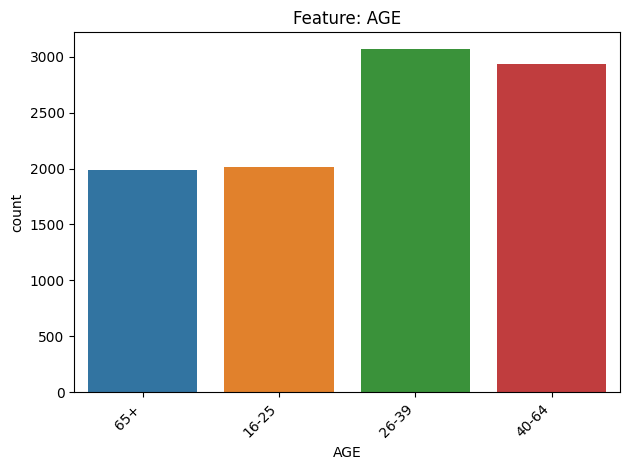


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '26-39' occurs 3063 times (30.63%)
- Not constant or quasi-constant.



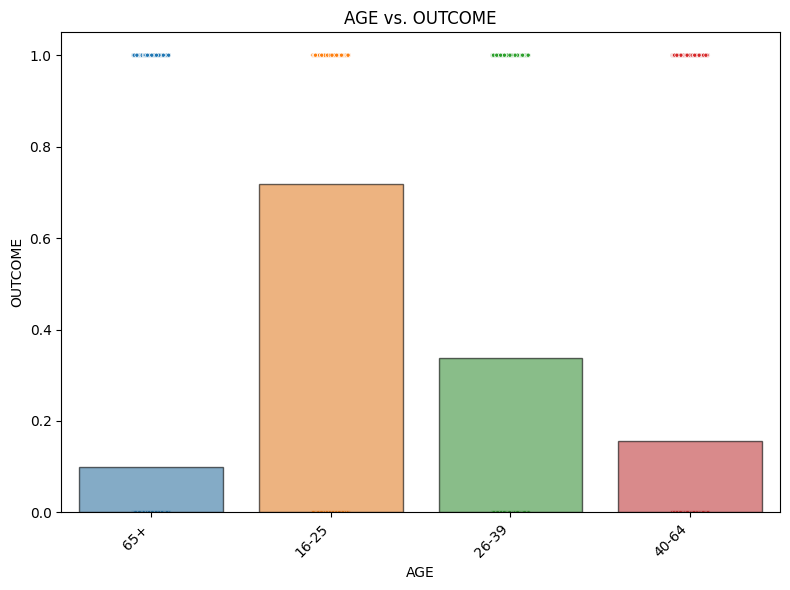

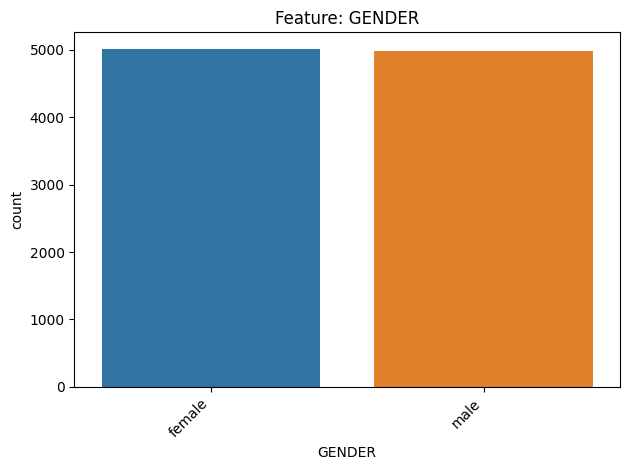


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'female' occurs 5010 times (50.1%)
- Not constant or quasi-constant.



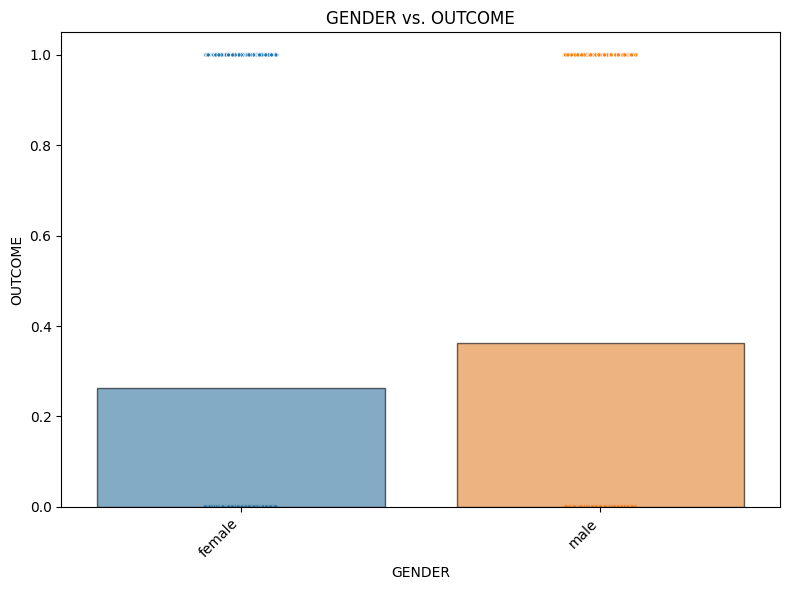

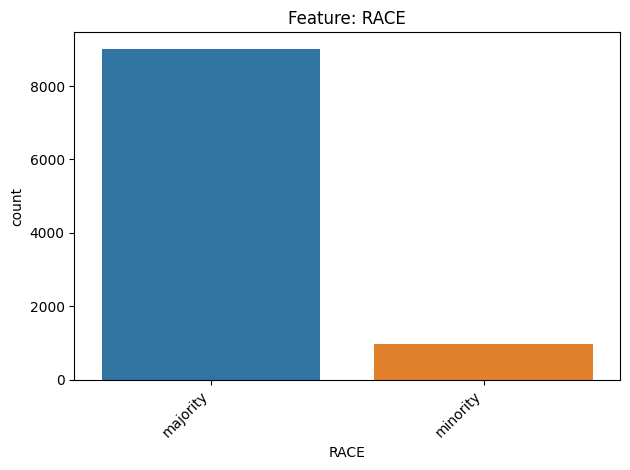


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'majority' occurs 9012 times (90.12%)
- Not constant or quasi-constant.



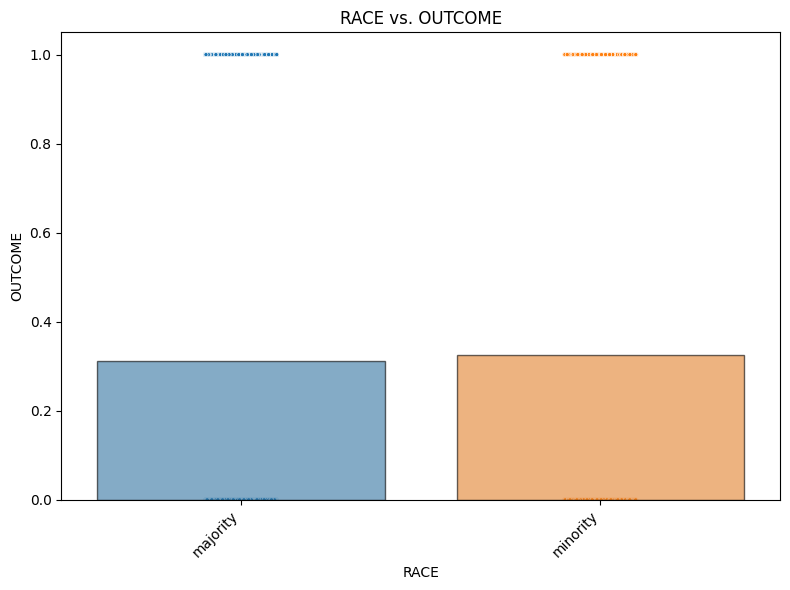

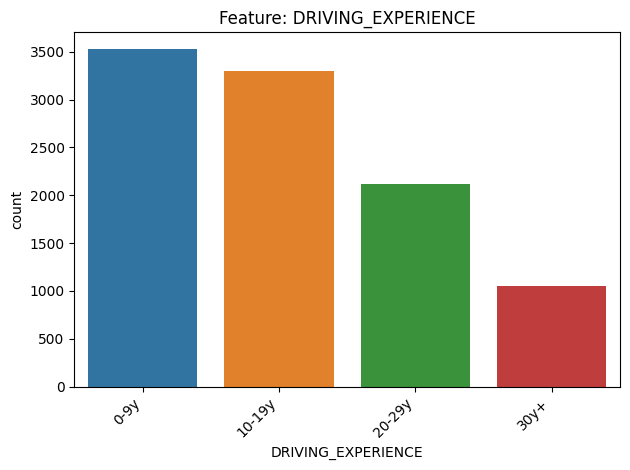


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '0-9y' occurs 3530 times (35.3%)
- Not constant or quasi-constant.



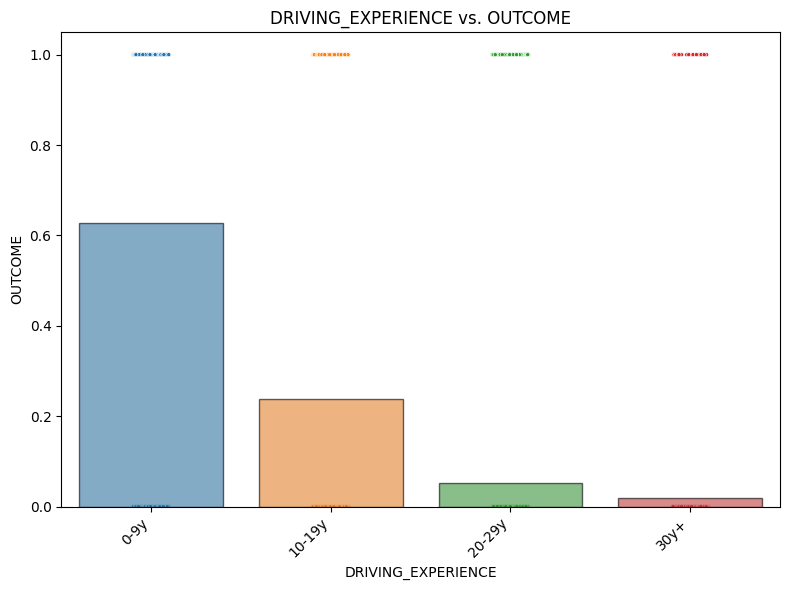

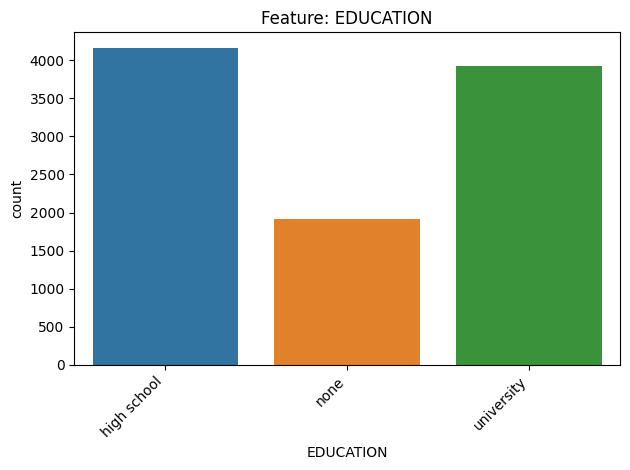


- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'high school' occurs 4157 times (41.57%)
- Not constant or quasi-constant.



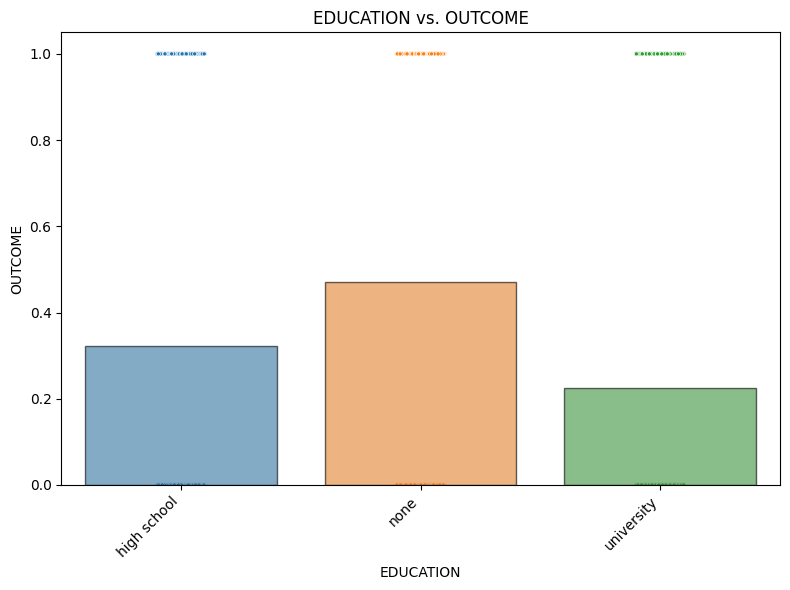

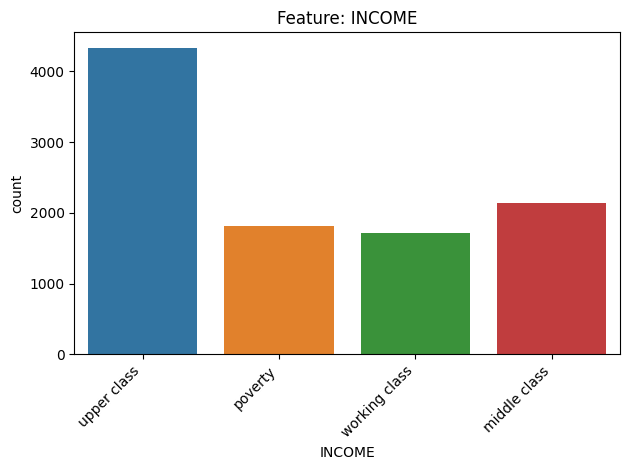


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'upper class' occurs 4336 times (43.36%)
- Not constant or quasi-constant.



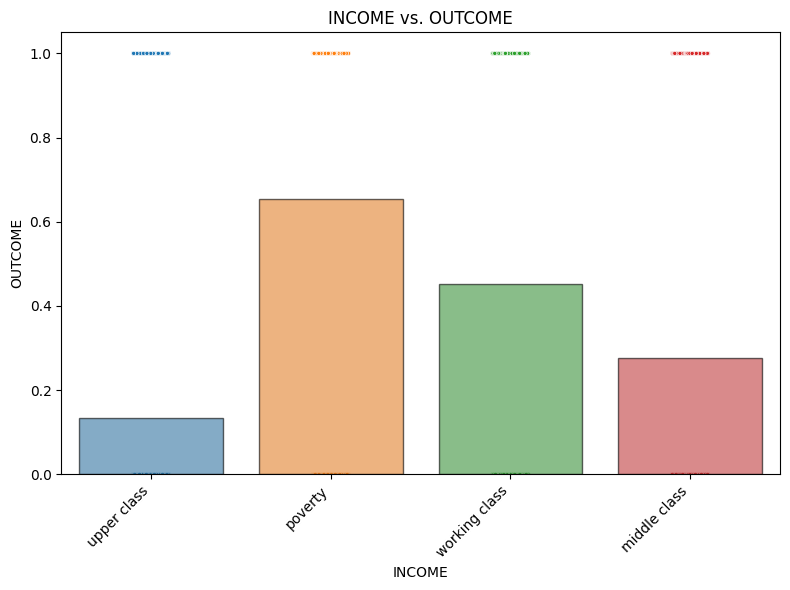

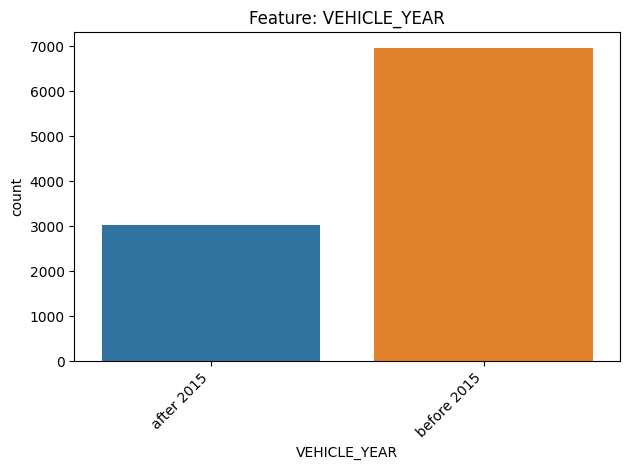


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'before 2015' occurs 6967 times (69.67%)
- Not constant or quasi-constant.



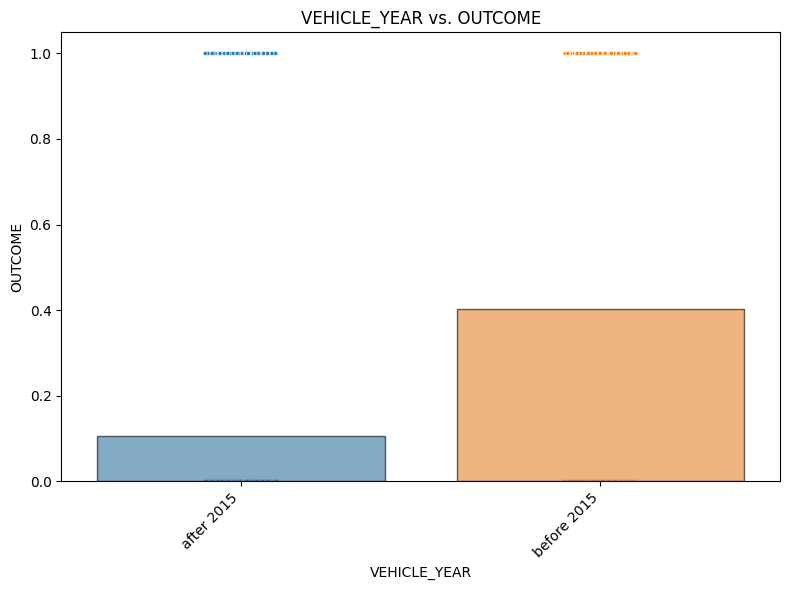

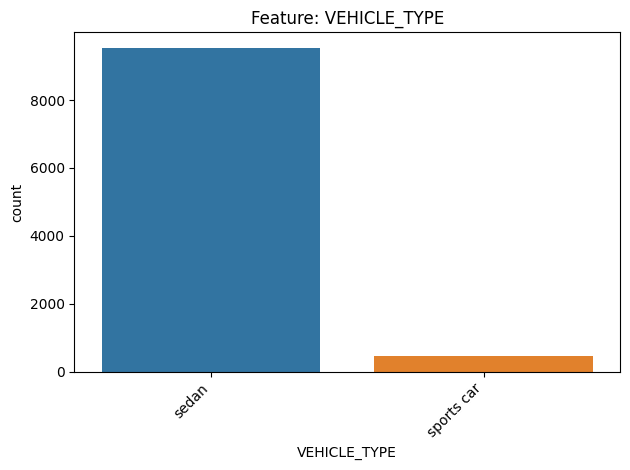


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'sedan' occurs 9523 times (95.23%)
- Not constant or quasi-constant.



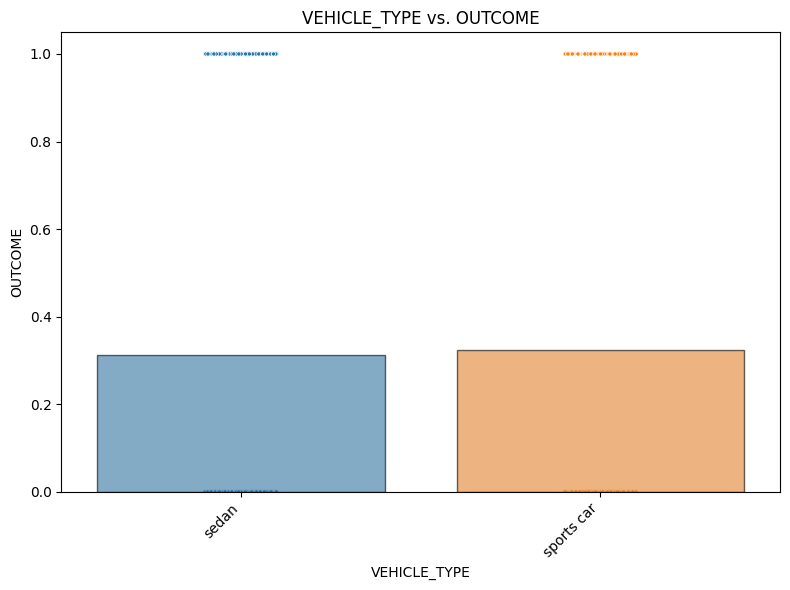

In [14]:
# loop through categorical columns
for col in cat_cols:
    explore_categorical(df, col)
    print('')
    categorical_vs_target(df, col)

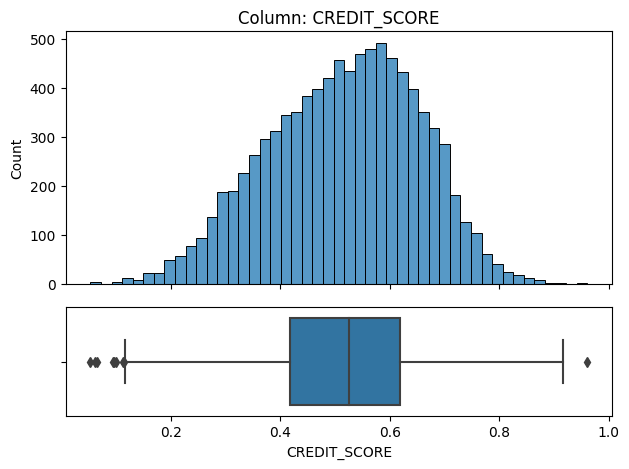

- NaN's Found: 982 (9.82%)



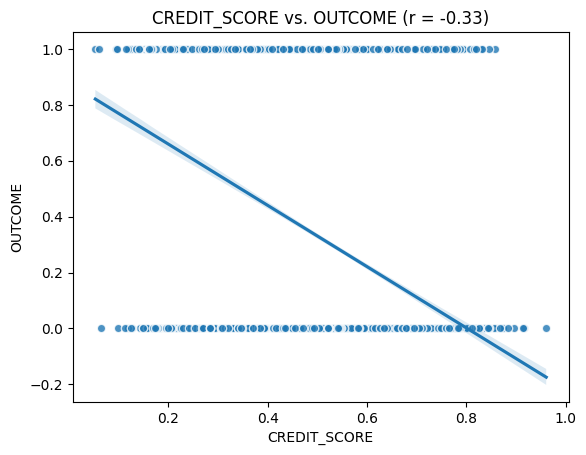

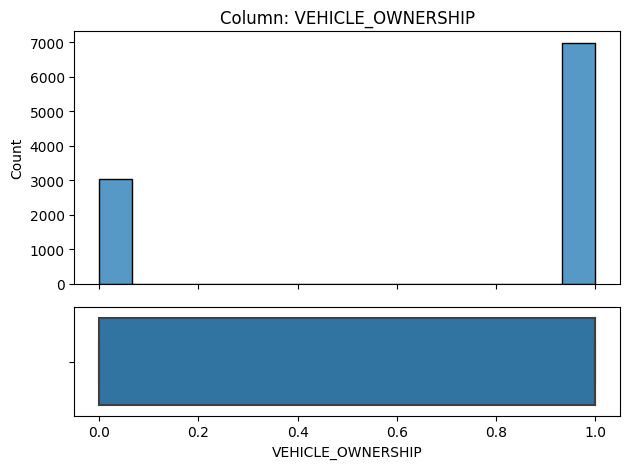

- NaN's Found: 0 (0.0%)



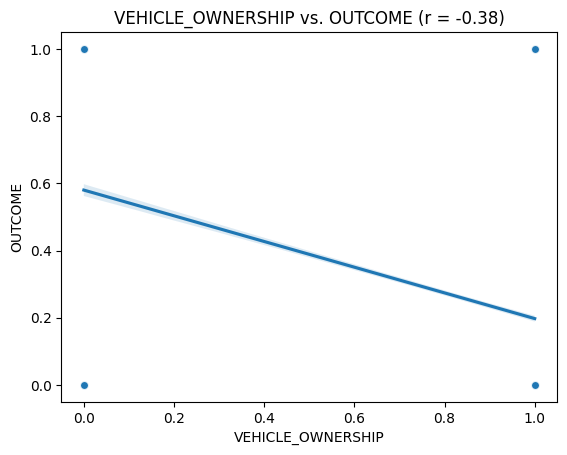

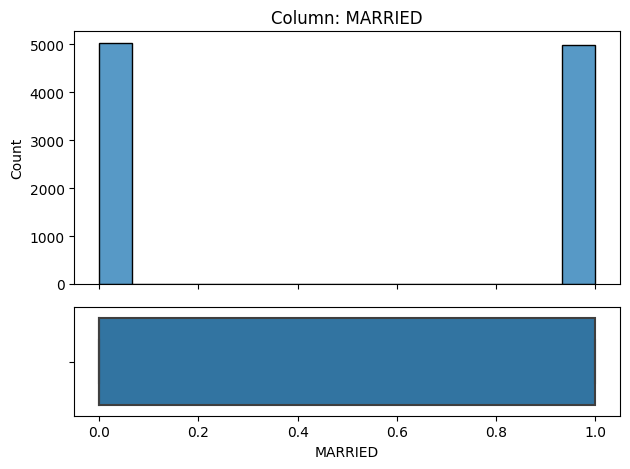

- NaN's Found: 0 (0.0%)



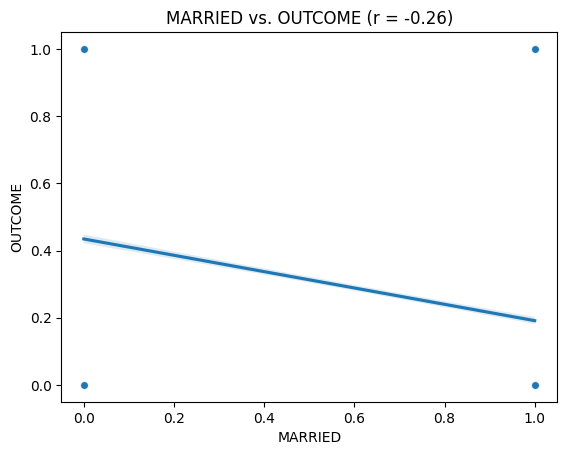

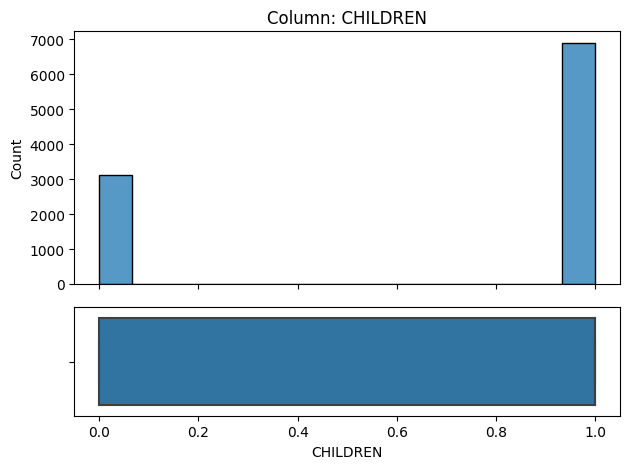

- NaN's Found: 0 (0.0%)



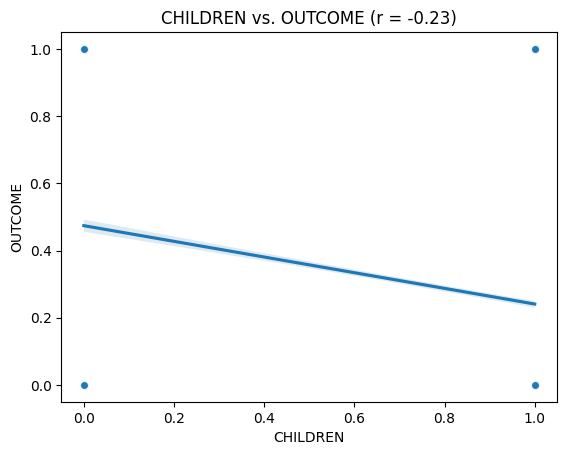

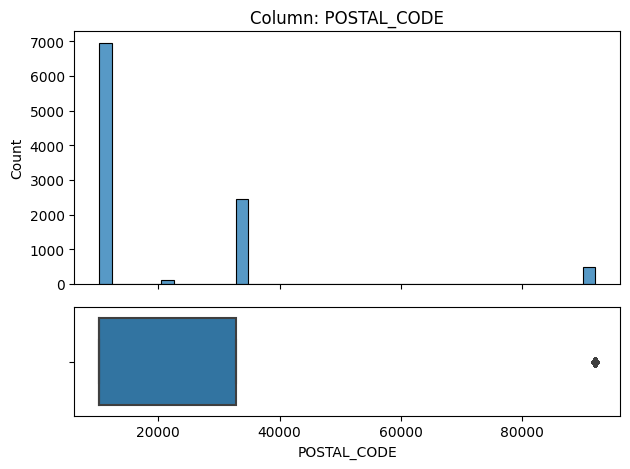

- NaN's Found: 0 (0.0%)



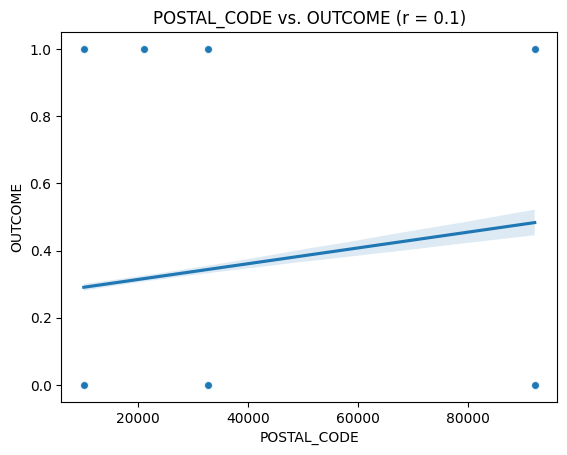

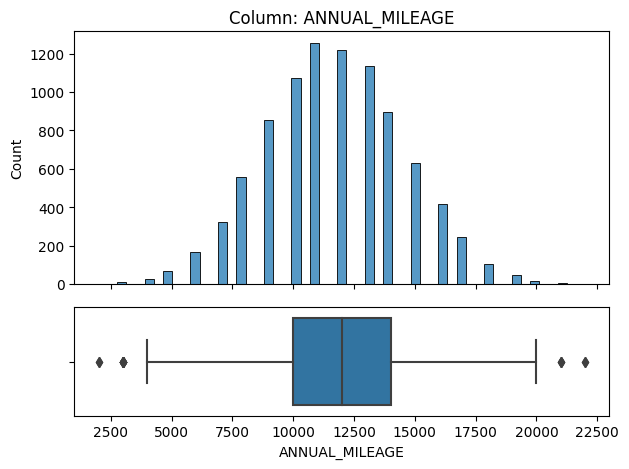

- NaN's Found: 957 (9.57%)



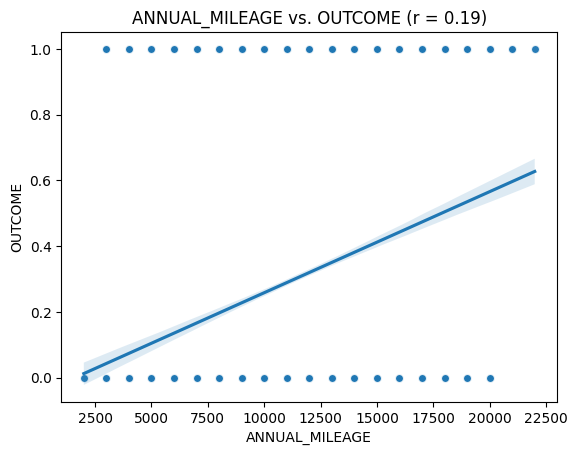

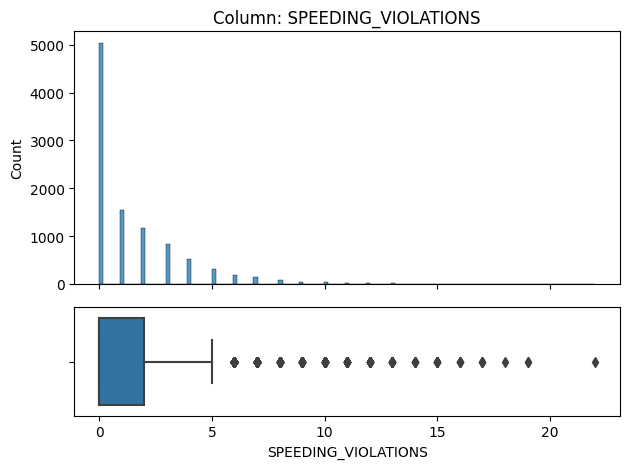

- NaN's Found: 0 (0.0%)



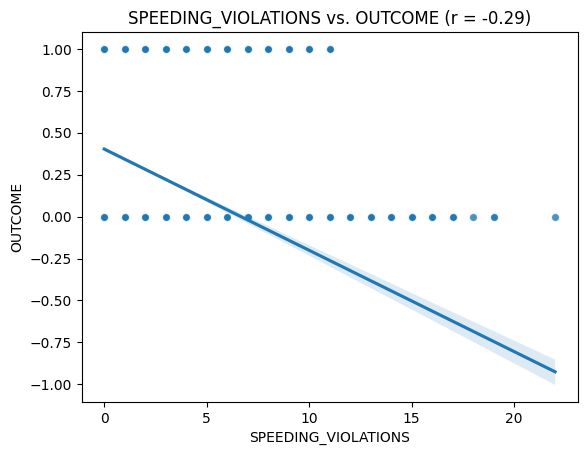

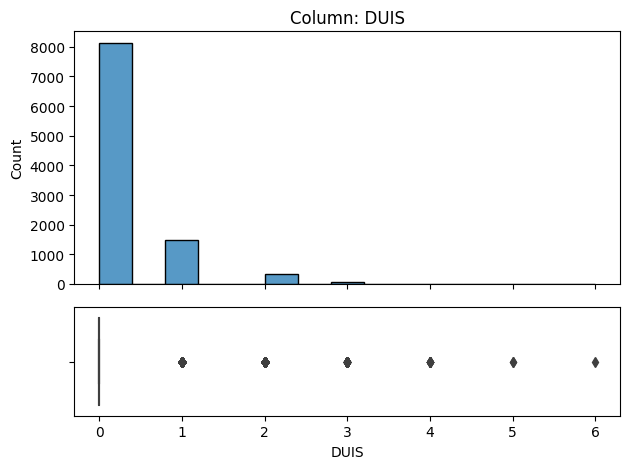

- NaN's Found: 0 (0.0%)



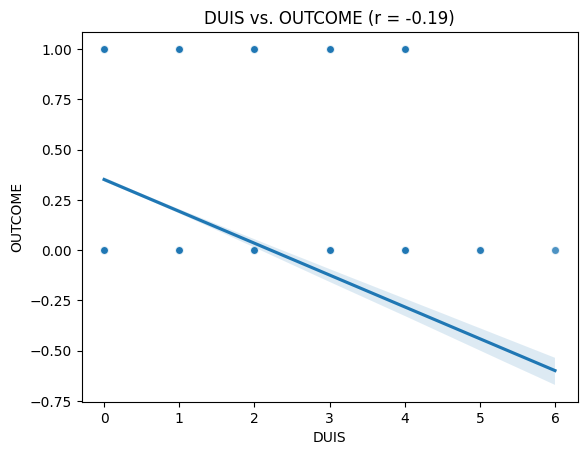

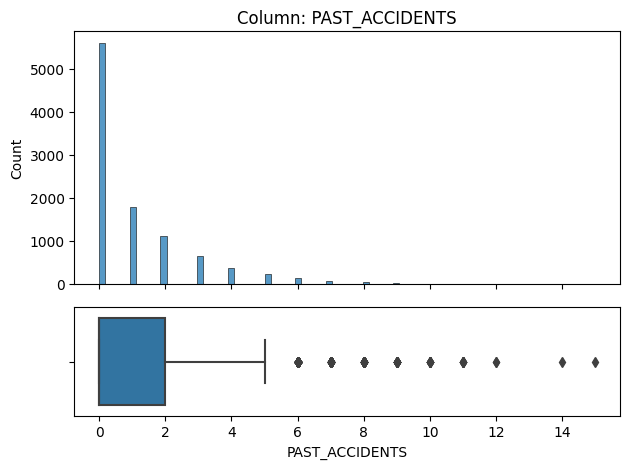

- NaN's Found: 0 (0.0%)



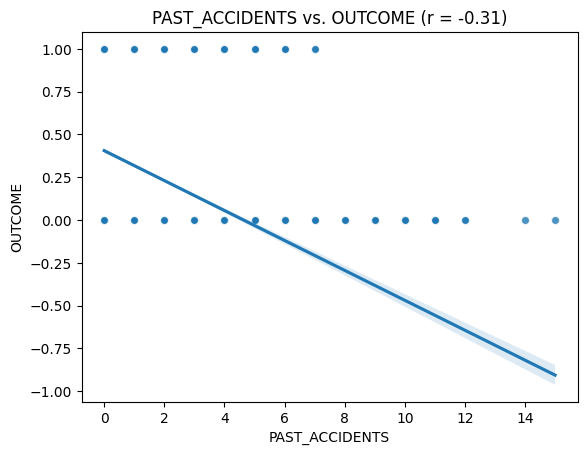

In [15]:
# loop through numeric columns
for col in num_cols:
    explore_numeric(df, col)
    print('')
    numeric_vs_target(df, col)

#### ***Pre-Processing Data***

In [16]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [17]:
df.isna().sum().sum()

1939

In [18]:
# change VEHICLE_OWNERSHIP, MARRIED, CHILDREN to object
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype('object')
df['MARRIED'] = df['MARRIED'].astype('object')
df['CHILDREN'] = df['CHILDREN'].astype('object')

df.dtypes

AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP       object
VEHICLE_YEAR            object
MARRIED                 object
CHILDREN                object
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [19]:
# import sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [20]:
# define X and y
y = df['OUTCOME']
X = df.drop(columns='OUTCOME')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
ID,,,,,,,,,,,,,,,,,
597605,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0
208394,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0
318837,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3
559214,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0
555274,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0


In [21]:
num_cols = X_train.select_dtypes('number').columns
ord_cols = ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN']
cat_cols = X_train.select_dtypes('object').columns.drop(ord_cols)

In [22]:
# pre-process data
# numerical columns
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(imputer, scaler)
num_tuple = ('numerical',num_pipe, num_cols)

# ordinal columns
scaler = StandardScaler()
ord_enc = OrdinalEncoder()
ord_pipe = make_pipeline(scaler, ord_enc)
ord_tuple = ('ordinal',ord_pipe, ord_cols)

# categorical columns
ohe = OneHotEncoder(sparse_output=False, drop='first')
cat_pipe = make_pipeline(ohe)
cat_tuple = ('categorical',cat_pipe, cat_cols)

# column transformer
preprocessor = ColumnTransformer([num_tuple, ord_tuple, cat_tuple], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [23]:
# fit and transform
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)

In [24]:
# choose classification model
from sklearn.linear_model import LogisticRegression
# instantiate model
logreg = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
# fit model
logreg.fit(X_train_tf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5144
         1.0       0.77      0.72      0.75      2356

    accuracy                           0.85      7500
   macro avg       0.82      0.81      0.82      7500
weighted avg       0.84      0.85      0.84      7500



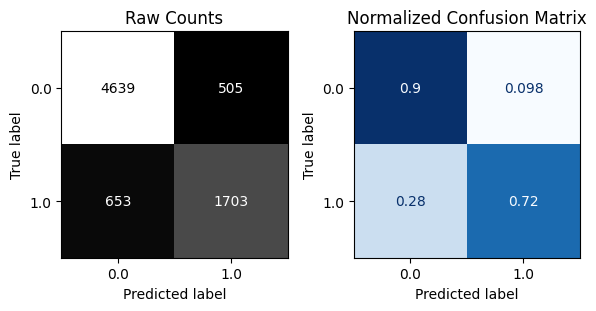


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1723
         1.0       0.77      0.71      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



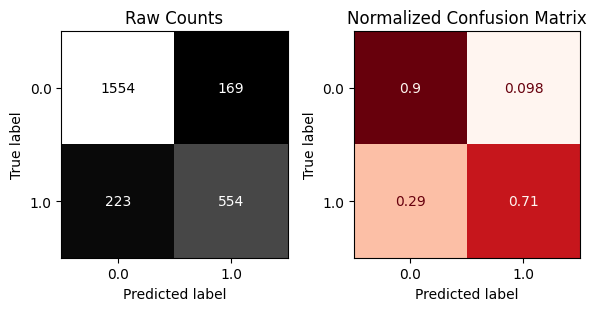

In [26]:
# evaluate model
evaluate_classification(logreg, X_train_tf, y_train, X_test_tf, y_test)

#### ***Model Insights***

In [27]:
# import permutation importance
from sklearn.inspection import permutation_importance

# get permutation importance
r = permutation_importance(logreg, X_test_tf, y_test, n_repeats =5, random_state = 42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [28]:
feature_names = preprocessor.get_feature_names_out()

In [29]:
permutation_importances = pd.Series(r['importances_mean'], index=feature_names, name='permutation importance')

# Sort importances
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

DRIVING_EXPERIENCE_20-29y    7.368000e-02
DRIVING_EXPERIENCE_10-19y    5.688000e-02
VEHICLE_YEAR_before 2015     4.888000e-02
VEHICLE_OWNERSHIP            4.472000e-02
DRIVING_EXPERIENCE_30y+      3.336000e-02
GENDER_male                  1.848000e-02
POSTAL_CODE                  8.720000e-03
PAST_ACCIDENTS               4.800000e-03
MARRIED                      4.800000e-03
CHILDREN                     4.480000e-03
ANNUAL_MILEAGE               3.040000e-03
AGE_26-39                    1.120000e-03
EDUCATION_none               8.800000e-04
INCOME_poverty               8.800000e-04
AGE_65+                      7.200000e-04
INCOME_working class         3.200000e-04
VEHICLE_TYPE_sports car      0.000000e+00
DUIS                        -2.220446e-17
EDUCATION_university        -8.000000e-05
CREDIT_SCORE                -8.000000e-05
RACE_minority               -2.400000e-04
AGE_40-64                   -4.000000e-04
INCOME_upper class          -6.400000e-04
SPEEDING_VIOLATIONS         -2.000

In [30]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

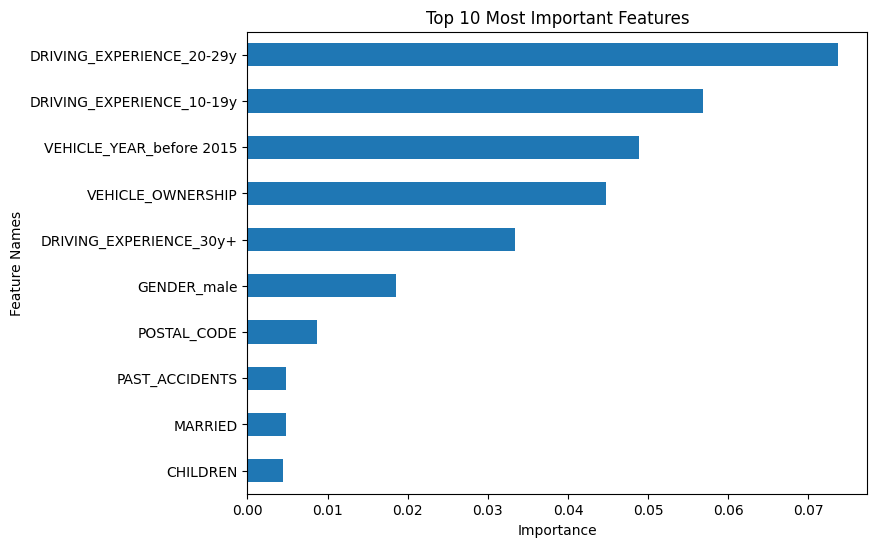

In [31]:
# visualize the top 10 features
plot_importance(permutation_importances, top_n=10);

By visualizing the top 10 features, it makes sense that the amount of driving experience is up there. Moreover, the age of the car is also an important feature, the same case applies when it's owned. Number of past accidents, if one is married or has children, all play an important role for purchasing insurance.

In [32]:
# convert array to dataframe
X_train_tf_df = pd.DataFrame(X_train_tf, columns=feature_names)
X_test_tf_df = pd.DataFrame(X_test_tf, columns=feature_names)

# combine dataframes
plot_train = pd.concat([X_train_tf_df,y_train],axis=1)
plot_test = pd.concat([X_test_tf_df,y_test],axis=1)
plot_df = pd.concat([plot_train, plot_test])

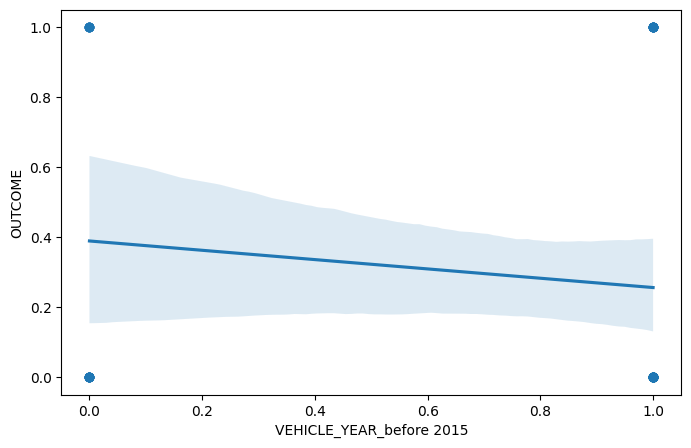

In [35]:
# Visualizing VEHICLE_YEAR vs OUTCOME side by side
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.regplot(x="VEHICLE_YEAR_before 2015", y="OUTCOME", data=plot_df)

We can see a negative trend when the car is older than 2015. This means that the older the car is, the less likely its owner will want to purchase insurance.

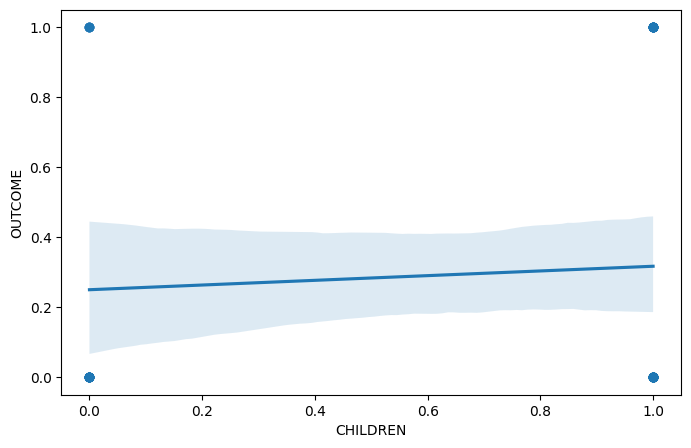

In [58]:
# visualizing GENDER vs OUTCOME side by side
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.regplot(x="CHILDREN", y="OUTCOME", data=plot_df)

Having children is slightly positively correlated. This means that when having children, it makes the person worried about his family, so they tend to purchase insurance

#### ***PCA***

In [37]:
from sklearn import set_config
set_config(transform_output='pandas')

In [38]:
# Import PCA
from sklearn.decomposition import PCA

# Apply PCA to get 3 principal components for the data.
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_tf)
X_test_pca = pca.transform(X_test_tf)

X_train_pca.head()

,pca0,pca1,pca2
0,0.217771,3.583069,-0.469767
1,-1.863703,0.564882,1.322806
2,0.336226,-0.719319,-0.727417
3,-2.013075,-1.331263,-0.030762
4,-1.911900,-0.162600,1.697545


In [39]:
X_train['PCA0'] = X_train_pca['pca0']
X_train['PCA1'] = X_train_pca['pca1']
X_train['PCA2'] = X_train_pca['pca2']

X_test['PCA0'] = X_test_pca['pca0']
X_test['PCA1'] = X_test_pca['pca1']
X_test['PCA2'] = X_test_pca['pca2']

X_train.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,PCA0,PCA1,PCA2
ID,,,,,,,,,,,,,,,,,,,,
597605,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0,NaN,NaN,NaN
208394,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0,NaN,NaN,NaN
318837,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3,NaN,NaN,NaN
559214,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0,NaN,NaN,NaN
555274,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0,NaN,NaN,NaN


In [40]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 597605 to 480416
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  7500 non-null   object 
 1   GENDER               7500 non-null   object 
 2   RACE                 7500 non-null   object 
 3   DRIVING_EXPERIENCE   7500 non-null   object 
 4   EDUCATION            7500 non-null   object 
 5   INCOME               7500 non-null   object 
 6   CREDIT_SCORE         6755 non-null   float64
 7   VEHICLE_OWNERSHIP    7500 non-null   object 
 8   VEHICLE_YEAR         7500 non-null   object 
 9   MARRIED              7500 non-null   object 
 10  CHILDREN             7500 non-null   object 
 11  POSTAL_CODE          7500 non-null   int64  
 12  ANNUAL_MILEAGE       6796 non-null   float64
 13  VEHICLE_TYPE         7500 non-null   object 
 14  SPEEDING_VIOLATIONS  7500 non-null   int64  
 15  DUIS                 7500 non-n

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,PCA0,PCA1,PCA2
ID,,,,,,,,,,,,,,,,,,,,
597605,40-64,male,majority,0-9y,high school,upper class,0.694461,1.0,before 2015,1.0,1.0,92101,NaN,sedan,0,0,0,NaN,NaN,NaN
208394,16-25,female,majority,0-9y,none,poverty,0.295794,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,0,0,0,NaN,NaN,NaN
318837,40-64,male,majority,10-19y,university,upper class,NaN,1.0,before 2015,1.0,1.0,10238,NaN,sedan,0,0,3,NaN,NaN,NaN
559214,26-39,female,majority,10-19y,university,working class,0.454836,1.0,before 2015,0.0,0.0,10238,20000.0,sedan,2,0,0,NaN,NaN,NaN
555274,16-25,female,majority,0-9y,none,poverty,0.152972,1.0,before 2015,1.0,0.0,10238,10000.0,sedan,0,0,0,NaN,NaN,NaN


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      5144
         1.0       0.66      0.54      0.59      2356

    accuracy                           0.77      7500
   macro avg       0.73      0.71      0.72      7500
weighted avg       0.76      0.77      0.76      7500



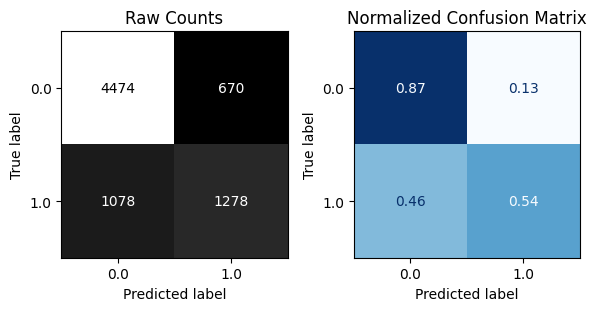


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1723
         1.0       0.66      0.56      0.61       777

    accuracy                           0.77      2500
   macro avg       0.74      0.71      0.72      2500
weighted avg       0.77      0.77      0.77      2500



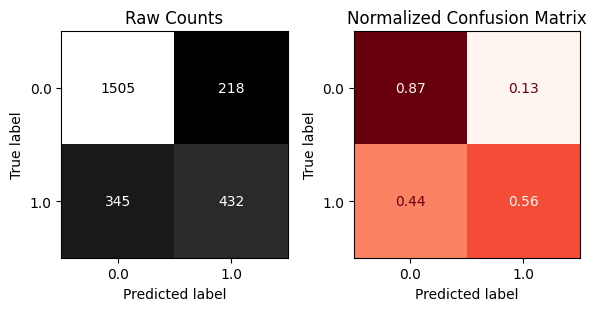

In [41]:
# Fit and evaluate a model with PCs
logreg_pca = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
logreg_pca.fit(X_train_pca, y_train)

# Evaluate
evaluate_classification(logreg_pca, X_train_pca, y_train, X_test_pca, y_test)

#### ***Feature Selection***

In [42]:
# We will use Embedded method for feature selection
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1))
selector.fit(X_train_tf, y_train)
selector

SelectFromModel(estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                             random_state=42))

In [43]:
above_threshold = selector.get_support()
# Only include the features that are above the threshold in X train and X test
X_train_sel = X_train_tf_df.loc[:,above_threshold]
X_test_sel = X_test_tf_df.loc[:,above_threshold]
X_train_sel.shape

(7500, 6)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.88      5144
         1.0       0.80      0.63      0.71      2356

    accuracy                           0.83      7500
   macro avg       0.82      0.78      0.79      7500
weighted avg       0.83      0.83      0.83      7500



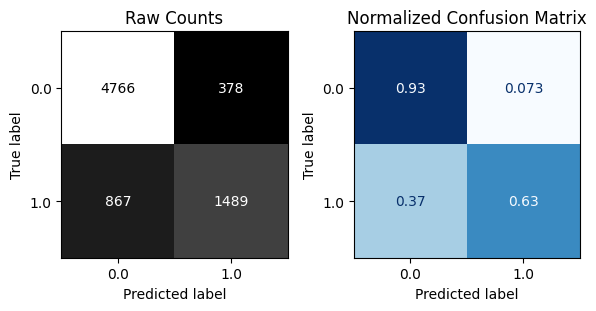


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      1723
         1.0       0.79      0.63      0.70       777

    accuracy                           0.83      2500
   macro avg       0.82      0.78      0.79      2500
weighted avg       0.83      0.83      0.83      2500



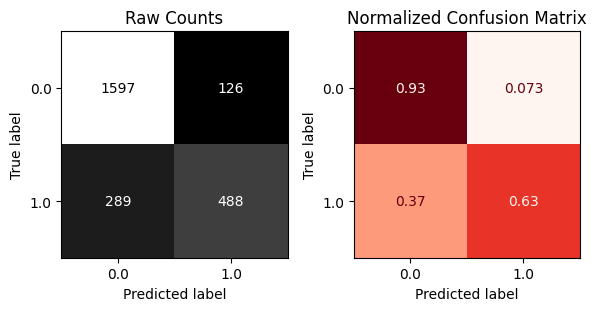

In [44]:
logreg_embeded = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
logreg_embeded.fit(X_train_sel, y_train)

# Evaluate
evaluate_classification(logreg_embeded, X_train_sel, y_train, X_test_sel, y_test)

In [45]:
# Extract and visualize the top 10 features using permutation importance.
r_embeded = permutation_importance(logreg_embeded, X_test_sel, y_test, n_repeats =5, random_state = 42)
r_embeded.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [46]:
feature_names_embeded = X_train_sel.columns

In [47]:
feature_names_embeded

Index(['VEHICLE_OWNERSHIP', 'GENDER_male', 'DRIVING_EXPERIENCE_10-19y',
       'DRIVING_EXPERIENCE_20-29y', 'DRIVING_EXPERIENCE_30y+',
       'VEHICLE_YEAR_before 2015'],
      dtype='object')

In [48]:
X_train_tf

array([[ 1.3679375 ,  3.86777596,  0.09833383, ...,  0.        ,
         1.        ,  0.        ],
       [-1.70280353,  0.69432101,  0.09833383, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06311764, -0.51048584,  0.09833383, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.84069192, -0.51048584,  0.09833383, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.72551124, -0.51048584, -1.40218236, ...,  0.        ,
         0.        ,  0.        ],
       [-1.33843708, -0.51048584, -0.65192426, ...,  1.        ,
         1.        ,  0.        ]])

In [49]:
importances_embeded = pd.Series(r_embeded['importances_mean'], index=feature_names_embeded, name='permutation importance')

# Sort importances
importances_embeded = importances_embeded.sort_values(ascending=False)
importances_embeded

DRIVING_EXPERIENCE_20-29y    0.08160
DRIVING_EXPERIENCE_10-19y    0.06784
VEHICLE_OWNERSHIP            0.06072
VEHICLE_YEAR_before 2015     0.05008
DRIVING_EXPERIENCE_30y+      0.04008
GENDER_male                  0.02768
Name: permutation importance, dtype: float64

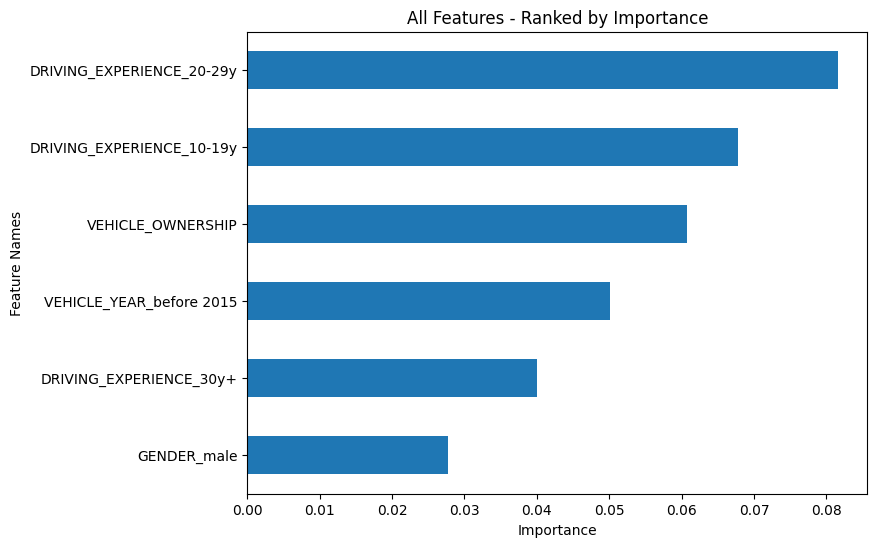

In [52]:
# visualize the top 10 features
plot_importance(importances_embeded);

After using Embeded feature selection method the number of feauters reduced to 6, the first 6 feature of the top 10 features from the original data stayed the same but their values now are different, for example, GENDER_male was around 0.2 and now it's around 0.3